In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [3]:
def das_dennis(n_partitions, n_dim):
    if n_partitions == 0:
        return np.full((1, n_dim), 1 / n_dim)
    else:
        ref_dirs = []
        ref_dir = np.full(n_dim, np.nan)
        das_dennis_recursion(ref_dirs, ref_dir, n_partitions, n_partitions, 0)
        return np.concatenate(ref_dirs, axis=0)


def das_dennis_recursion(ref_dirs, ref_dir, n_partitions, beta, depth):
    if depth == len(ref_dir) - 1:
        ref_dir[depth] = beta / (1.0 * n_partitions)
        #print('in if vector is {0}'.format(ref_dir))
        ref_dirs.append(ref_dir[None, :])
    else:
        for i in range(beta + 1):
            ref_dir[depth] = 1.0 * i / (1.0 * n_partitions)
            #print(ref_dir)
            das_dennis_recursion(ref_dirs, np.copy(ref_dir), n_partitions, beta - i, depth + 1)


In [4]:
def evaluate_chebyshev(objective_vector,refference_vector):
    ideal_vector = [0 for i in range(len(objective_vector))]
    chebyshev_eval = []
    for i in range(len(objective_vector)):
        chebyshev_eval.append(refference_vector[i]*(objective_vector[i]-ideal_vector[i]))
    return max(chebyshev_eval)

In [5]:
def weighted_sum_approach(objective_vector,refference_vector):
    weighted_sum = np.dot(objective_vector,refference_vector)
    return weighted_sum

In [6]:

def evaluate_penalty_boundary_intersection(objective_vector,refference_vector,penalty_factor):
    ideal_vector = [0 for i in range(len(objective_vector))]
    d1 = 0
    d2 = 0
    d1 = sum(np.multiply(np.subtract(ideal_vector,objective_vector),refference_vector))
    
    d2 = sum(np.subtract(objective_vector,np.subtract(ideal_vector,np.multiply(d1,refference_vector))))
    penalty_boundary_eval = d1 + penalty_factor*d2
    return penalty_boundary_eval
    
    

In [11]:
!pip install -U pymoo

     -------------------------------------- 795.9/795.9 kB 6.3 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 48.9/48.9 kB ? eta 0:00:00
     -------------------------------------- 249.1/249.1 kB 5.1 MB/s eta 0:00:00
     ---------------------------------------- 80.9/80.9 kB 4.4 MB/s eta 0:00:00
     -------------------------------------- 110.5/110.5 kB 6.3 MB/s eta 0:00:00
     -------------------------------------- 829.2/829.2 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 207.3/207.3 kB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 50.9/50.9 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata

  DEPRECATION: grapheme is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559
  DEPRECATION: wrapt is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559
  DEPRECATION: future is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at h

In [7]:
import pymoo

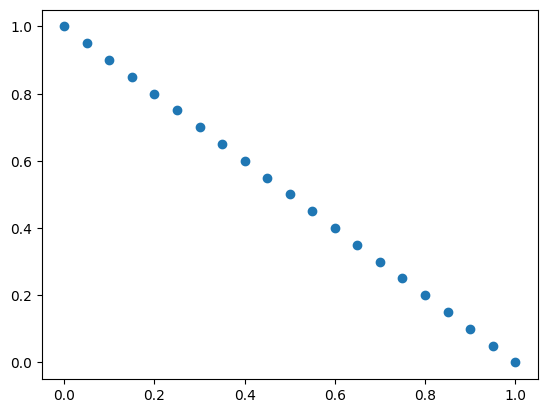

In [12]:
from pymoo.util.ref_dirs import get_reference_directions
from pymoo.visualization.scatter import Scatter
plot_x=[]
plot_y=[]
ref_dirs = das_dennis(20,2)
for i in ref_dirs:
    plot_x.append(i[0])
    plot_y.append(i[1])
plt.scatter(plot_x,plot_y)
#ref_dirs

In [14]:
import pandas as pd
data_1 = pd.read_csv('D2.csv')
data_1

,0.435344866558839,0.655245285482528
0,0.316450,0.758259
1,0.602232,0.580219
2,0.836818,0.194869
3,0.251349,1.473587
4,0.360032,0.784126
...,...,...
994,0.313879,0.776337
995,1.320998,0.657226
996,0.613306,1.039713
997,0.531487,0.929645


In [15]:
values = []
for i in range(len(data_1)):
    x=list(data_1.iloc[i,:])
    values.append(x)
value=[]
for j in data_1.columns:
    value.append(float(j))
    
values.append(value)
values

[[0.316449543667039, 0.758258571231771],
 [0.602232068062087, 0.580218868138703],
 [0.8368183536129, 0.194869308389008],
 [0.251349494995888, 1.47358681304998],
 [0.360032450905399, 0.78412635904104],
 [0.318978406597533, 1.31694841001049],
 [0.489986869371494, 1.29986068931332],
 [0.266379816705035, 1.29987330990395],
 [0.551035075810251, 0.826378848078223],
 [0.45827565034582, 1.36331046516571],
 [0.676665262109046, 0.628215567397459],
 [1.18209664202322, 0.13727645551361],
 [0.809300907585905, 0.975678983797025],
 [1.12733642980159, 0.376400007255685],
 [0.509270740875233, 0.751725991058333],
 [0.192573899606526, 1.53990162455006],
 [0.0582252036234702, 1.10472476139513],
 [0.786766108218951, 1.13430911388327],
 [0.688005529824612, 0.534217932840603],
 [0.792618330568744, 0.29099038677926],
 [0.869116055196455, 0.204585498545704],
 [1.49149740410095, 0.278054253561094],
 [0.357267738036402, 1.46040928865794],
 [0.248002669253614, 1.49242286602689],
 [0.514339272150243, 1.24390951502

In [16]:
scalarized_vectors = []
weight_vectors = das_dennis(3,2)
for i in weight_vectors:
    scalarized_values_chebychev = []
    for j in values :
        #print(evaluate_chebyshev(j,i))
        scalarized_values_chebychev.append(evaluate_chebyshev(j,i))
    scalarized_vectors.append(scalarized_values_chebychev)
print('solutions')
scalarized_vectors


solutions


[[0.758258571231771,
  0.580218868138703,
  0.194869308389008,
  1.47358681304998,
  0.78412635904104,
  1.31694841001049,
  1.29986068931332,
  1.29987330990395,
  0.826378848078223,
  1.36331046516571,
  0.628215567397459,
  0.13727645551361,
  0.975678983797025,
  0.376400007255685,
  0.751725991058333,
  1.53990162455006,
  1.10472476139513,
  1.13430911388327,
  0.534217932840603,
  0.29099038677926,
  0.204585498545704,
  0.278054253561094,
  1.46040928865794,
  1.49242286602689,
  1.24390951502772,
  1.91582389182583,
  0.847997582751993,
  0.55954577491314,
  0.669339882137387,
  0.220675050765311,
  0.239470465942267,
  1.38932281616578,
  0.208815270122547,
  0.93986620296095,
  0.41313559004413,
  0.725097925924829,
  0.725856085156001,
  0.272656256263456,
  0.532595935859968,
  0.400974076949164,
  0.0279547752205901,
  1.09664712438726,
  0.917075217948736,
  0.252438412930759,
  0.215104796515493,
  0.735885663955141,
  0.154733047414119,
  1.39417098557744,
  1.10394082

In [19]:
weight_vectors

array([[0.        , 1.        ],
       [0.33333333, 0.66666667],
       [0.66666667, 0.33333333],
       [1.        , 0.        ]])

In [89]:
selected_values=[]
for i in scalarized_vectors:
    selected_values.append(min(i))
selected_values
print(ref_dirs[selected_values.index(min(selected_values))])

[0.10485308 0.89514692]


In [78]:
scalarized_vectors = []
weight_vectors = get_reference_directions("energy",2,3,seed=1)
for i in values:
    scalarized_values_chebychev = []
    for j in weight_vectors:
        #print(evaluate_penalty_boundary_intersection(i,j,5))
        scalarized_values_chebychev.append(evaluate_penalty_boundary_intersection(i,j,5))
    scalarized_vectors.append(scalarized_values_chebychev)
scalarized_vectors

0.8239891471034239
2.1470500921248776
3.474843312491816
2.4309414721717317
2.365019765559906
2.2988622726314283
3.9892224596754926
2.0668133248709717
0.1375281883321401
-0.21683933807054
3.4433268427307446
7.1165845702540125
1.0160358954859547
2.286046356722112
3.560599344299801
0.277943622977175
3.266508938395396
6.265763643454917
1.1500736575441501
3.5753577841872475
6.009316577195106
0.03202577362122527
3.1269713099818155
6.232986732814714
1.9287965309730322
2.753353225865963
3.580859164580864
0.9280677865633902
3.6383252567946425
6.358276675482729
2.755110743147771
2.6100211345799122
2.464412574878249
5.77320675460249
2.644341799170227
-0.4957143644551699
3.0708255541325005
3.569068733897503
4.069094011399219
5.260282141752264
3.0114945641397943
0.7546636064768351
1.794627713317832
2.5206949786266324
3.2493592144164323
-0.5770321265174301
3.4577353449467405
7.506934223143775
-0.8135987432777791
2.3202953319559882
5.46539860335218
2.7995214272114852
3.840289154490348
4.8847794611973

2.353731022306647
2.4678690176695413
2.5824152575834294
4.296794876624128
2.4052794658352887
0.5069985528390399
4.859317267329713
2.764358711596085
0.6619069857553552
3.6495199896832773
3.1904013637387294
2.729640579311319
5.530569632525176
2.5421164442232813
-0.4570257326678001
6.66547511528451
3.2509916828224346
-0.17570454741423003
-0.816303993680185
3.6012343760179206
8.0345732332093
0.507739869762817
2.2049073342070367
3.9081451643281877
5.545010137934076
3.462205464267086
1.371951092047855
1.3963316452692898
3.2937871545647512
5.198029412391774
0.9789035175061649
2.9457917003372955
4.91971497591299
4.355184227135874
3.8666978201162214
3.37646421302295
0.860581235856054
2.1905089406256946
3.525193481512554
-1.1500936667485548
3.1904512865830625
7.546521340210254
2.811182483778752
2.4677436181331847
2.123076353083424
-0.8253850120003134
2.0594974061650992
4.954698364828193
3.680549010488151
3.1606483083305617
2.638888044612957
3.672055456375717
3.6843742739362115
3.696737152986727


[[0.8239891471034239, 2.1470500921248776, 3.474843312491816],
 [2.4309414721717317, 2.365019765559906, 2.2988622726314283],
 [3.9892224596754926, 2.0668133248709717, 0.1375281883321401],
 [-0.21683933807054, 3.4433268427307446, 7.1165845702540125],
 [1.0160358954859547, 2.286046356722112, 3.560599344299801],
 [0.277943622977175, 3.266508938395396, 6.265763643454917],
 [1.1500736575441501, 3.5753577841872475, 6.009316577195106],
 [0.03202577362122527, 3.1269713099818155, 6.232986732814714],
 [1.9287965309730322, 2.753353225865963, 3.580859164580864],
 [0.9280677865633902, 3.6383252567946425, 6.358276675482729],
 [2.755110743147771, 2.6100211345799122, 2.464412574878249],
 [5.77320675460249, 2.644341799170227, -0.4957143644551699],
 [3.0708255541325005, 3.569068733897503, 4.069094011399219],
 [5.260282141752264, 3.0114945641397943, 0.7546636064768351],
 [1.794627713317832, 2.5206949786266324, 3.2493592144164323],
 [-0.5770321265174301, 3.4577353449467405, 7.506934223143775],
 [-0.8135987